In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import uniform
#from BFM.MCMC_MGP import Gibbs_sampling
from BFM.MCMC_LH import Gibbs_sampling
#from BFM.MCMC_CSP import Gibbs_sampling
from BFM.VI import NGVI

In [2]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
P = 1000
K = 5
N = 500

In [4]:
B_0 = np.random.binomial(1,1/3,(P,K)) * np.random.rand(P,K)
sigma2_0 = np.diag(uniform.rvs(loc = 0.1, scale = 0.9, size = P))
cov_0 = B_0 @ B_0.T + sigma2_0

In [5]:
X = np.random.multivariate_normal(np.zeros(P), cov_0, N)

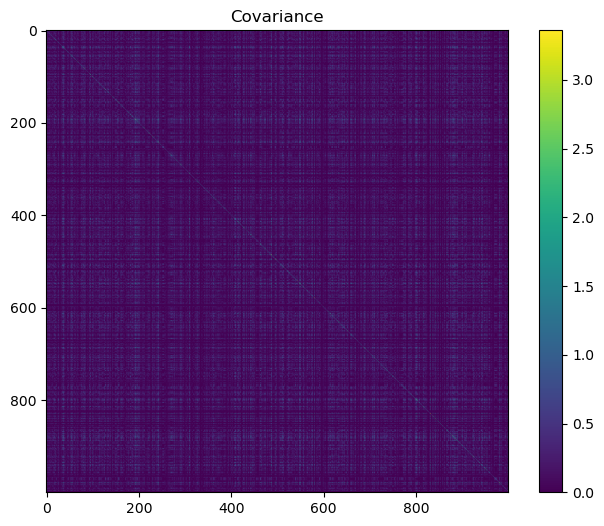

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(cov_0)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [ ]:
B_sample, sigma2_sample = Gibbs_sampling(X, device = device1, a = 1, b = 100, c = 0.3)
#B_sample, sigma2_sample = Gibbs_sampling(X, device = device1)


In [7]:
mu, Precision, np_sigma, v = NGVI(X, device = device1, a = 1, b = 100, c = 0.25)

100%|██████████| 50/50 [01:50<00:00,  2.20s/it]


In [8]:
B = mu @ mu.T + (v / (v-2)) * torch.diag(torch.vmap(torch.trace)(torch.linalg.inv(Precision))) + torch.diag(np_sigma / (0.5 * N))

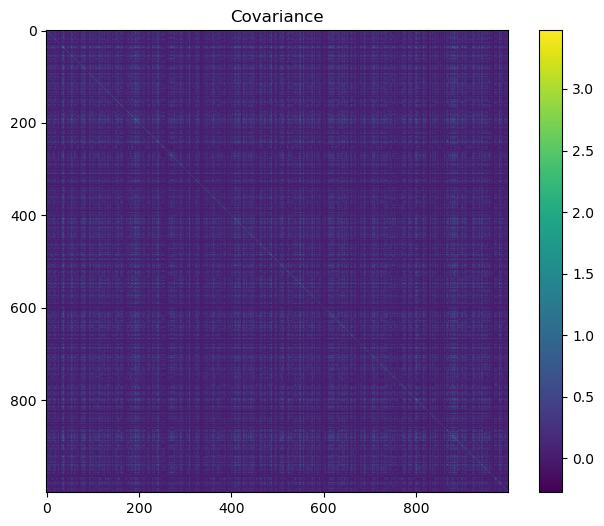

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(B.to('cpu'))
plt.colorbar()
plt.title("Covariance")
plt.show()

In [10]:
v

tensor([ 891.8478, 1125.9194,  863.8354, 1073.8354,  983.0283,  957.2794,
         895.8594, 1042.7573,  947.8054, 1008.6539,  860.8867,  902.6597,
         945.8539, 1049.8216,  932.4064, 1017.2881,  907.4100,  884.9740,
         908.0719,  948.1708,  904.6742,  887.1930, 1066.2718, 1106.1092,
         729.3989,  907.5194, 1155.0677, 1073.5440,  855.5034,  822.9207,
         878.3778,  981.1387,  777.1856, 1039.7659, 1091.1815,  805.5712,
         828.3146, 1164.1150, 1070.7882, 1133.0157, 1089.4823, 1139.6147,
        1263.8909, 1059.3963,  913.7481, 1131.0480,  846.7527, 1082.8785,
         798.6934,  903.9647,  982.4740, 1052.8777,  651.6192, 1031.0255,
         970.1578, 1054.5651,  944.4353,  945.1524,  675.3053, 1031.8519,
        1056.5716,  929.5346, 1010.6906, 1133.2207, 1017.0208,  807.5045,
        1150.5854, 1090.4282,  966.6690, 1043.7930,  881.4529, 1002.7804,
         676.1191, 1100.6707, 1037.4079, 1026.9990, 1007.1001, 1062.2407,
         963.0499, 1126.2139, 1140.346

In [11]:
(torch.from_numpy(cov_0) - B.to('cpu')).square().sum()/P**2

tensor(0.0028, dtype=torch.float64)

In [12]:
(torch.from_numpy(cov_0) - B.to('cpu')).abs().sum()/P**2

tensor(0.0341, dtype=torch.float64)

In [ ]:
for i in range(50):
    print(mu[:,i].abs().sum())

In [ ]:
A = torch.einsum('bij,bjk->bik',B_sample, B_sample.transpose(1,2))
for i in range(10000):
    A[i] = A[i] + torch.diag(sigma2_sample[i])

In [ ]:
A_mean = A.mean(0)

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(A_mean)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [ ]:
(torch.from_numpy(cov_0) - A_mean).square().sum() / P**2

In [ ]:
(torch.from_numpy(cov_0) - A_mean).abs().sum() / P**2

In [ ]:
B_mean = B_sample.mean(0)

In [ ]:
for i in range(50):
    print(B_mean[:,i].abs().sum())